# Imports

In [50]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA
from clusteval import clusteval
import random

# Encoding 

In [161]:
local_golden_df = pd.read_csv("/home/mih_sud/code/willbanny/Location-Analysis/raw_data/London_Golden_Exapanded_2.csv")
label_df = pd.read_csv('/home/mih_sud/code/willbanny/Location-Analysis/raw_data/labels_export.csv')

In [162]:
local_golden_df

,park_100,museum_100,parking_100,hospital_100,bus_station_100,train_station_100,leisure_centre_100,national_trust_100,places_of_worship_100,park_250,...,Outdoors_Sub_domain_Rank__where_1_is_most_deprived_,Outdoors_Sub_domain_Decile__where_1_is_most_deprived_10__of_LSOAs_,Total_population__mid_2015__excluding_prisoners_,Dependent_Children_aged_0_15__mid_2015__excluding_prisoners_,Population_aged_16_59__mid_2015__excluding_prisoners_,Older_population_aged_60_and_over__mid_2015__excluding_prisoners_,Working_age_population_18_59_64__for_use_with_Employment_Deprivation_Domain__excluding_prisoners__,longitude,latitude,district_name
0,1,0,0,0,0,0,0,0.0,0,0,...,204,1,1814,415,1024,375,1010,-0.190502,51.522395,City of Westminster London Boro
1,0,0,0,0,0,0,0,0.0,0,0,...,732,1,2131,492,1269,370,1274,-0.210154,51.527489,City of Westminster London Boro
2,0,0,0,0,0,0,0,0.0,0,0,...,784,1,1365,311,789,265,762,-0.171863,51.525287,City of Westminster London Boro
3,0,0,0,0,0,0,0,0.0,0,0,...,1337,1,2898,796,1548,554,1503,-0.166644,51.526265,City of Westminster London Boro
4,0,0,1,0,0,0,0,0.0,0,0,...,411,1,2186,529,1278,379,1269,-0.172417,51.523192,City of Westminster London Boro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28381,0,0,0,0,0,0,0,0.0,0,0,...,5497,2,1374,205,907,262,917,-0.215878,51.424615,Merton London Boro
28382,0,0,0,0,0,0,0,0.0,0,0,...,5497,2,1374,205,907,262,917,-0.215878,51.424615,Merton London Boro
28383,0,0,0,0,0,0,0,0.0,0,0,...,5497,2,1374,205,907,262,917,-0.215878,51.424615,Merton London Boro
28384,0,0,0,0,0,0,0,0.0,0,0,...,5497,2,1374,205,907,262,917,-0.215878,51.424615,Merton London Boro


In [163]:
label_df

,Unnamed: 0,lng,lat,MinMax_PCA_Crime_Labels,Robust_PCA_Crime_Labels,MinMax_PCA_Crimeless_Labels,Robust_PCA_Crimeless_Labels,MinMax_Non_PCA_Crime_Labels,Robust__Non_PCA_Crime_Labels,MinMax_Non_PCA_Crimeless_Labels,Robust__Non_PCA_Crimeless_Labels
0,0,-0.355127,51.607913,0,0,1,1,1,0,2,0
1,1,-0.351505,51.607913,0,0,1,1,1,0,2,0
2,2,-0.351507,51.605664,0,0,1,1,1,0,2,0
3,3,-0.402215,51.603414,0,0,1,1,1,0,2,0
4,4,-0.402215,51.601165,0,0,1,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
28381,28381,0.090047,51.371217,1,0,0,2,2,0,0,0
28382,28382,0.093642,51.368968,1,0,0,2,2,0,0,0
28383,28383,0.090030,51.366718,1,0,0,2,2,0,0,0
28384,28384,0.090039,51.368968,1,0,0,2,2,0,0,0


In [164]:
crime_features =                   ['Anti_social_behaviour_100',
                                    'Criminal_damage_and_arson_100',
                                    'Drugs_100',
                                    'Other_theft_100',
                                    'Public_order_100',
                                    'Vehicle_crime_100',
                                    'Violence_and_sexual_offences_100',
                                    'Theft_from_the_person_100',
                                    'Burglary_100',
                                    'Shoplifting_100',
                                    'Possession_of_weapons_100',
                                    'Other_crime_100',
                                    'Robbery_100',
                                    'Bicycle_theft_100',
                                    'Anti_social_behaviour_250',
                                    'Criminal_damage_and_arson_250',
                                    'Drugs_250',
                                    'Other_theft_250',
                                    'Public_order_250',
                                    'Vehicle_crime_250',
                                    'Violence_and_sexual_offences_250',
                                    'Theft_from_the_person_250',
                                    'Burglary_250',
                                    'Shoplifting_250',
                                    'Possession_of_weapons_250',
                                    'Other_crime_250',
                                    'Robbery_250',
                                    'Bicycle_theft_250',
                                    'Anti_social_behaviour_500',
                                    'Criminal_damage_and_arson_500',
                                    'Drugs_500',
                                    'Other_theft_500',
                                    'Public_order_500',
                                    'Vehicle_crime_500',
                                    'Violence_and_sexual_offences_500',
                                    'Theft_from_the_person_500',
                                    'Burglary_500',
                                    'Shoplifting_500',
                                    'Possession_of_weapons_500',
                                    'Other_crime_500',
                                    'Robbery_500',
                                    'Bicycle_theft_500',
                                    'Anti_social_behaviour_750',
                                    'Criminal_damage_and_arson_750',
                                    'Drugs_750',
                                    'Other_theft_750',
                                    'Public_order_750',
                                    'Vehicle_crime_750',
                                    'Violence_and_sexual_offences_750',
                                    'Theft_from_the_person_750',
                                    'Burglary_750',
                                    'Shoplifting_750',
                                    'Possession_of_weapons_750',
                                    'Other_crime_750',
                                    'Robbery_750',
                                    'Bicycle_theft_750',
                                    'Anti_social_behaviour_1000',
                                    'Criminal_damage_and_arson_1000',
                                    'Drugs_1000',
                                    'Other_theft_1000',
                                    'Public_order_1000',
                                    'Vehicle_crime_1000',
                                    'Violence_and_sexual_offences_1000',
                                    'Theft_from_the_person_1000',
                                    'Burglary_1000',
                                    'Shoplifting_1000',
                                    'Possession_of_weapons_1000',
                                    'Other_crime_1000',
                                    'Robbery_1000',
                                    'Bicycle_theft_1000',
                                    'Anti_social_behaviour_1250',
                                    'Criminal_damage_and_arson_1250',
                                    'Drugs_1250',
                                    'Other_theft_1250',
                                    'Public_order_1250',
                                    'Vehicle_crime_1250',
                                    'Violence_and_sexual_offences_1250',
                                    'Theft_from_the_person_1250',
                                    'Burglary_1250',
                                    'Shoplifting_1250',
                                    'Possession_of_weapons_1250',
                                    'Other_crime_1250',
                                    'Robbery_1250',
                                    'Bicycle_theft_1250',
                                    'Anti_social_behaviour_1500',
                                    'Criminal_damage_and_arson_1500',
                                    'Drugs_1500',
                                    'Other_theft_1500',
                                    'Public_order_1500',
                                    'Vehicle_crime_1500',
                                    'Violence_and_sexual_offences_1500',
                                    'Theft_from_the_person_1500',
                                    'Burglary_1500',
                                    'Shoplifting_1500',
                                    'Possession_of_weapons_1500',
                                    'Other_crime_1500',
                                    'Robbery_1500',
                                    'Bicycle_theft_1500']


In [165]:
local_golden_df = local_golden_df.fillna(0)

dirty_city_features = local_golden_df.columns

city_features = []

for feature in dirty_city_features:
    if "250" in feature:
        city_features.append(feature)
    elif "500" in feature:
        city_features.append(feature)
    elif "750" in feature:
        city_features.append(feature)
    elif "100" in feature:
        city_features.append(feature)
    elif "1000" in feature:
        city_features.append(feature)
    elif "1250" in feature:
        city_features.append(feature)
    elif "1500" in feature:
        city_features.append(feature)
    elif "Score" in feature:
        if "1" not in feature:
            city_features.append(feature)


#Create a DataFrame which will be scaled

to_scale_df = pd.DataFrame()
for feature in city_features:
    to_scale_df[feature] = local_golden_df[feature]


#Scaling

#MinMax Scale the DataFrame

mm_scaler = MinMaxScaler()
mm_scaler.fit(to_scale_df)
mm_scaled_df = pd.DataFrame(mm_scaler.transform(to_scale_df), columns=city_features)

#Robust Scale the DataFrame

r_scaler = RobustScaler()
r_scaler.fit(to_scale_df)
r_scaled_df = pd.DataFrame(r_scaler.transform(to_scale_df), columns=city_features)


#Crimeless selection

crimeless_features = list(set(city_features) - set(crime_features))


mm_crimeless_non_PCA_df = pd.DataFrame()
r_crimeless_non_PCA_df = pd.DataFrame()

for feature in crimeless_features:

    r_crimeless_non_PCA_df[feature] = r_scaled_df[feature]
    mm_crimeless_non_PCA_df[feature] = mm_scaled_df[feature]


#PCA

#MinMax Crime PCA

mm_pca = PCA()
mm_pca.fit(mm_scaled_df)

mm_proj = mm_pca.transform(mm_scaled_df)
mm_proj = pd.DataFrame(mm_proj, columns=[f'PC{i}' for i in range(1, len(city_features) + 1)])

#MinMax Crimeless PCA

mm_crimeless_pca = PCA()
mm_crimeless_pca.fit(mm_crimeless_non_PCA_df)

mm_crimeless_proj = mm_crimeless_pca.transform(mm_crimeless_non_PCA_df)
mm_crimeless_proj = pd.DataFrame(mm_crimeless_proj, columns=[f'PC{i}' for i in range(1, len(crimeless_features) + 1)])

#Robust Crime PCA

r_pca = PCA()
r_pca.fit(r_scaled_df)

r_proj = r_pca.transform(r_scaled_df)
r_proj = pd.DataFrame(r_proj, columns=[f'PC{i}' for i in range(1, len(city_features )+ 1)])

#Robust Crimeless PCA

r_crimeless_pca = PCA()
r_crimeless_pca.fit(r_crimeless_non_PCA_df)

r_crimeless_proj = r_crimeless_pca.transform(r_crimeless_non_PCA_df)
r_crimeless_proj = pd.DataFrame(r_crimeless_proj, columns=[f'PC{i}' for i in range(1, len(crimeless_features) + 1)])


/tmp/ipykernel_24351/2361562276.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  to_scale_df[feature] = local_golden_df[feature]
/tmp/ipykernel_24351/2361562276.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  to_scale_df[feature] = local_golden_df[feature]
/tmp/ipykernel_24351/2361562276.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-

In [166]:
rnpc_target_df = label_df[["Robust__Non_PCA_Crime_Labels"]].copy()

In [167]:
rnpc_target_df

,Robust__Non_PCA_Crimeless_Labels
0,0
1,0
2,0
3,0
4,0
...,...
28381,0
28382,0
28383,0
28384,0


In [81]:
onehot_encoder = OneHotEncoder(sparse=False)
rnpc_encoded_target_array = onehot_encoder.fit_transform(rnpc_target_df)
rnpc_encoded_target_df = pd.DataFrame(rnpc_encoded_target_array, columns = onehot_encoder.get_feature_names_out())


/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Robust__Non_PCA_Crimeless_Labels
0,0
1,0
2,0
3,0
4,0
...,...
28381,0
28382,0
28383,0
28384,0


In [70]:
len(crimeless_features)

58

In [84]:
rnpc_target_list = rnpc_encoded_target_df.columns
rnpc_target_list

Index(['Robust__Non_PCA_Crimeless_Labels_0',
       'Robust__Non_PCA_Crimeless_Labels_1',
       'Robust__Non_PCA_Crimeless_Labels_2'],
      dtype='object')

In [87]:
# Train a classifier (could use any, but example uses Random Forest Classifier)
r_feature_importance_list = []

for target in rnpc_target_list:
    
    clf = RandomForestClassifier(random_state=1)
    clf.fit(r_crimeless_non_PCA_df.values, rnpc_encoded_target_df[target].values)

    # Index sort the most important features
    sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort
    
    most_important_features = np.take_along_axis(
    np.array(r_crimeless_non_PCA_df.iloc[:, 0: len(crimeless_features) + 1].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
    most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)


    r_feature_importance_list.append(list(zip(most_important_features, most_important_weights)))

In [88]:
# Get the most important features names and weights
feature_importance_list[0]

[('place_of_worship_1250', 0.14750433309005193),
 ('place_of_worship_1000', 0.13578402608090562),
 ('place_of_worship_1500', 0.09481337283938336),
 ('park_1000', 0.07114403494193575),
 ('place_of_worship_750', 0.05520474237808973),
 ('park_750', 0.05344176015277355),
 ('park_1250', 0.04928548859413401),
 ('bus_station_1250', 0.03269673164856914),
 ('liquor_store_1250', 0.031150183262020306),
 ('place_of_worship_500', 0.02862419380125772),
 ('liquor_store_1500', 0.02847102487493996),
 ('park_500', 0.023432515323327928),
 ('liquor_store_1000', 0.02246534418645255),
 ('bus_station_1500', 0.021305469659875658),
 ('liquor_store_750', 0.019509423440406824),
 ('bus_station_1000', 0.014005531977831293),
 ('hospital_1500', 0.01363742687925523),
 ('bus_station_750', 0.012244375787162098),
 ('park_1500', 0.009417068237875055),
 ('Outdoors_Sub_domain_Score', 0.008735794160692567),
 ('liquor_store_500', 0.008282637653134986),
 ('bus_station_500', 0.007630480074232829),
 ('Living_Environment_Score',

In [89]:
feature_importance_list[1]

[('place_of_worship_750', 0.20006863168713396),
 ('place_of_worship_1000', 0.19590622257822102),
 ('place_of_worship_500', 0.092054294199368),
 ('park_1000', 0.04693752415848178),
 ('bus_station_750', 0.03752363707082506),
 ('place_of_worship_1250', 0.03612324474847797),
 ('park_750', 0.03532970812562193),
 ('bus_station_1000', 0.02903772299882219),
 ('liquor_store_750', 0.024968527017467698),
 ('liquor_store_1000', 0.02358938441690744),
 ('place_of_worship_250', 0.018511567940645315),
 ('park_1250', 0.017160277975984937),
 ('bus_station_500', 0.016981299859216058),
 ('park_500', 0.015268825517312597),
 ('Outdoors_Sub_domain_Score', 0.014046161924495974),
 ('Living_Environment_Score', 0.009767824550540068),
 ('bus_station_1250', 0.009480281886711916),
 ('place_of_worship_1500', 0.009088529703596674),
 ('liquor_store_1250', 0.008674460080047538),
 ('hospital_750', 0.008167944709303442),
 ('hospital_1000', 0.008139471553982395),
 ('park_1500', 0.008028584436535148),
 ('liquor_store_500',

In [90]:
feature_importance_list[2]

[('place_of_worship_1000', 0.11635684489483979),
 ('place_of_worship_1250', 0.10212659147990695),
 ('place_of_worship_1500', 0.09160310757256683),
 ('place_of_worship_750', 0.0614866236280071),
 ('park_1000', 0.058468447033062206),
 ('park_750', 0.043363004441501596),
 ('park_1250', 0.04241702811455845),
 ('liquor_store_1500', 0.03186886514499082),
 ('liquor_store_1250', 0.030575503329707897),
 ('bus_station_1500', 0.030479733695111758),
 ('bus_station_1250', 0.025059453012155918),
 ('place_of_worship_500', 0.023355777741031935),
 ('liquor_store_1000', 0.02195234627380286),
 ('bus_station_1000', 0.019147665886342705),
 ('park_1500', 0.016652865185738667),
 ('hospital_1500', 0.015881124709884148),
 ('Outdoors_Sub_domain_Score', 0.015383115780340557),
 ('bus_station_750', 0.015110393671942342),
 ('liquor_store_750', 0.013223114022351302),
 ('Living_Environment_Score', 0.012919626289597069),
 ('hospital_1250', 0.012637274048899702),
 ('Geographical_Barriers_Sub_domain_Score', 0.0114246181

In [95]:
mmnpc_target_df = label_df[["MinMax_Non_PCA_Crimeless_Labels"]].copy()

In [97]:
mm_onehot_encoder = OneHotEncoder(sparse=False)
mmnpc_encoded_target_array = onehot_encoder.fit_transform(mmnpc_target_df)
mmnpc_encoded_target_df = pd.DataFrame(mmnpc_encoded_target_array, columns = onehot_encoder.get_feature_names_out())
mmnpc_encoded_target_df

/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,MinMax_Non_PCA_Crimeless_Labels_0,MinMax_Non_PCA_Crimeless_Labels_1,MinMax_Non_PCA_Crimeless_Labels_2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
28381,1.0,0.0,0.0
28382,1.0,0.0,0.0
28383,1.0,0.0,0.0
28384,1.0,0.0,0.0


In [99]:
mmnpc_target_list = mmnpc_encoded_target_df.columns
mmnpc_target_list

Index(['MinMax_Non_PCA_Crimeless_Labels_0',
       'MinMax_Non_PCA_Crimeless_Labels_1',
       'MinMax_Non_PCA_Crimeless_Labels_2'],
      dtype='object')

In [100]:
mm_feature_importance_list = []

for target in mmnpc_target_list:
    
    clf = RandomForestClassifier(random_state=1)
    clf.fit(mm_crimeless_non_PCA_df.values, mmnpc_encoded_target_df[target].values)

    # Index sort the most important features
    sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort
    
    most_important_features = np.take_along_axis(
    np.array(mm_crimeless_non_PCA_df.iloc[:, 0: len(crimeless_features) + 1].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
    most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)


    mm_feature_importance_list.append(list(zip(most_important_features, most_important_weights)))

In [101]:
mm_feature_importance_list[0]

[('Index_of_Multiple_Deprivation__IMD__Score', 0.20414828078348315),
 ('Income_Score__rate_', 0.12318006263207465),
 ('Income_Deprivation_Affecting_Older_People__IDAOPI__Score__rate_',
  0.08079390497801399),
 ('Wider_Barriers_Sub_domain_Score', 0.07986802370833822),
 ('Income_Deprivation_Affecting_Children_Index__IDACI__Score__rate_',
  0.073113782250736),
 ('Health_Deprivation_and_Disability_Score', 0.06740283052492498),
 ('Employment_Score__rate_', 0.060441734737590964),
 ('Education__Skills_and_Training_Score', 0.04050213733484242),
 ('Children_and_Young_People_Sub_domain_Score', 0.033969967273100775),
 ('Outdoors_Sub_domain_Score', 0.024717526487148027),
 ('Living_Environment_Score', 0.02401407670105985),
 ('Adult_Skills_Sub_domain_Score', 0.021137702471163373),
 ('Crime_Score', 0.019611247674532067),
 ('Barriers_to_Housing_and_Services_Score', 0.018051079365515924),
 ('place_of_worship_1250', 0.008960094194126928),
 ('Indoors_Sub_domain_Score', 0.008597560664417959),
 ('Geographi

In [102]:
mm_feature_importance_list[1]

[('place_of_worship_1250', 0.08657729269947306),
 ('place_of_worship_1000', 0.059688783443664475),
 ('liquor_store_1000', 0.05453323652295698),
 ('Outdoors_Sub_domain_Score', 0.05255707477451189),
 ('Living_Environment_Score', 0.04492933290889842),
 ('park_1250', 0.044268662537767546),
 ('liquor_store_1250', 0.04198362806920228),
 ('place_of_worship_1500', 0.040318321224729475),
 ('liquor_store_1500', 0.037358133265237986),
 ('park_1000', 0.036309177609372106),
 ('liquor_store_750', 0.034890953248945734),
 ('Index_of_Multiple_Deprivation__IMD__Score', 0.02629525730920214),
 ('Adult_Skills_Sub_domain_Score', 0.025623827039076223),
 ('liquor_store_500', 0.02378832204680729),
 ('Education__Skills_and_Training_Score', 0.021933074704149163),
 ('bus_station_1250', 0.021363789866602412),
 ('park_750', 0.020909223358933908),
 ('bus_station_1000', 0.020840639406029034),
 ('Geographical_Barriers_Sub_domain_Score', 0.020789051772142995),
 ('Wider_Barriers_Sub_domain_Score', 0.01964231506181363),


In [103]:
mm_feature_importance_list[2]

[('Index_of_Multiple_Deprivation__IMD__Score', 0.19908213085039975),
 ('Income_Score__rate_', 0.12500300050166765),
 ('Education__Skills_and_Training_Score', 0.07749366576185193),
 ('Employment_Score__rate_', 0.0753483343532389),
 ('Income_Deprivation_Affecting_Children_Index__IDACI__Score__rate_',
  0.07203983743209222),
 ('Health_Deprivation_and_Disability_Score', 0.0473613806608428),
 ('Wider_Barriers_Sub_domain_Score', 0.04671370373379198),
 ('Income_Deprivation_Affecting_Older_People__IDAOPI__Score__rate_',
  0.046307768299618156),
 ('Children_and_Young_People_Sub_domain_Score', 0.04028858331249096),
 ('Adult_Skills_Sub_domain_Score', 0.03680381293541526),
 ('Barriers_to_Housing_and_Services_Score', 0.028724546319778346),
 ('place_of_worship_1250', 0.018605694906232678),
 ('place_of_worship_1000', 0.018026803951067354),
 ('Crime_Score', 0.01623987692780951),
 ('Outdoors_Sub_domain_Score', 0.011547657065935777),
 ('Living_Environment_Score', 0.011262310605216843),
 ('place_of_worsh

In [104]:
mmnpc_target_df.value_counts()

MinMax_Non_PCA_Crimeless_Labels
0                                  14608
2                                  10465
1                                   3313
Name: count, dtype: int64

In [105]:
rnpc_target_df.value_counts()

Robust__Non_PCA_Crimeless_Labels
0                                   21654
2                                    4935
1                                    1797
Name: count, dtype: int64

# Feature Elimination

In [112]:
england_care_home_df = pd.read_csv('/home/mih_sud/code/willbanny/Location-Analysis/raw_data/carehome_locations (3).csv')

#Only store those that fit the golden df dimensions

care_home_local_df = england_care_home_df[england_care_home_df["latitude"] <= local_golden_df["lat"].max()]
care_home_local_df = care_home_local_df[care_home_local_df["latitude"] >= local_golden_df["lat"].min() ]
care_home_local_df = care_home_local_df[care_home_local_df["longitude"] >= local_golden_df["lng"].min() ]
care_home_local_df = care_home_local_df[care_home_local_df["longitude"] <= local_golden_df["lng"].max() ]


## Churchless features

In [107]:
church_features = []
for feature in crimeless_features:
    if "worship" in feature:
        church_features.append(feature)
        
church_features

['place_of_worship_750',
 'place_of_worship_250',
 'place_of_worship_100',
 'place_of_worship_1250',
 'place_of_worship_1500',
 'place_of_worship_1000',
 'place_of_worship_500']

In [110]:
churchless_rnpc_df = r_crimeless_non_PCA_df.drop(columns = church_features)
churchless_mmnpc_df = mm_crimeless_non_PCA_df.drop(columns = church_features)

In [118]:
church_mm_km = KMeans(n_clusters= 3)
church_mm_km.fit(churchless_mmnpc_df)

church_r_km = KMeans(n_clusters= 3)
church_r_km.fit(churchless_rnpc_df)

/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

-------------------------------------Robust Churchless----------------------------------------------------------


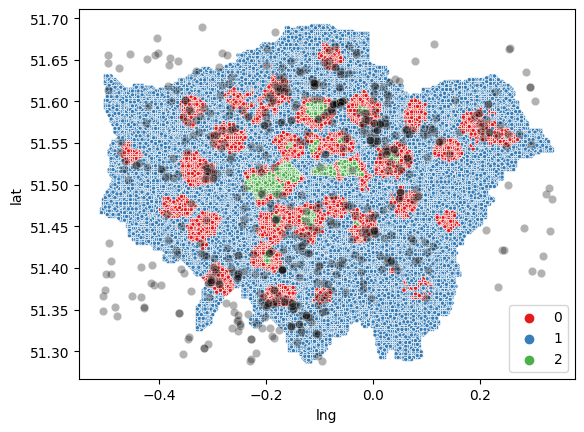

-------------------------------------MinMax Churchless----------------------------------------------------------


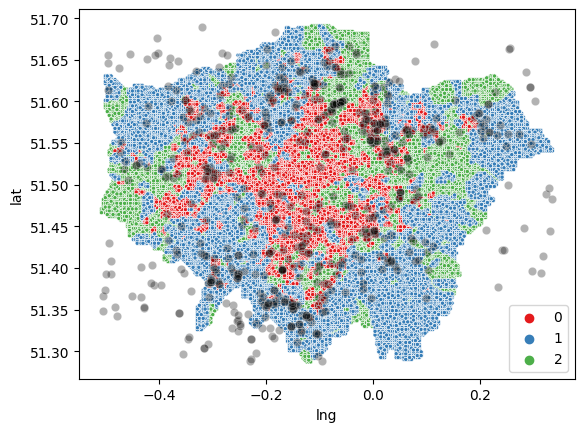

In [119]:

print("-------------------------------------Robust Churchless----------------------------------------------------------")

sns.scatterplot(x=local_golden_df['lng'], y=local_golden_df['lat'], hue=church_r_km.labels_, palette='Set1', marker = ".")

sns.scatterplot(x = care_home_local_df["longitude"], y = care_home_local_df["latitude"], c='black' ,alpha=0.3)


plt.show()


print("-------------------------------------MinMax Churchless----------------------------------------------------------")


sns.scatterplot(x=local_golden_df['lng'], y=local_golden_df['lat'], hue=church_mm_km.labels_, palette='Set1', marker = ".")

sns.scatterplot(x = care_home_local_df["longitude"], y = care_home_local_df["latitude"], c='black' ,alpha=0.3)


plt.show()


### Robust Factor Importance

In [121]:
church_less_features = churchless_rnpc_df.columns

In [141]:
church_r_feature_importance_list = []

for target in rnpc_target_list:
    
    clf = RandomForestClassifier(random_state=1)
    clf.fit(churchless_rnpc_df.values, rnpc_encoded_target_df[target].values)

    # Index sort the most important features
    sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort
    
    most_important_features = np.take_along_axis(
    np.array(churchless_rnpc_df.iloc[:, 0: len(church_less_features) + 1].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
    most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)


    church_r_feature_importance_list.append(list(zip(most_important_features, most_important_weights)))

In [142]:
church_r_feature_importance_list[0]

[('park_1000', 0.11702194732325652),
 ('park_750', 0.10544738655902727),
 ('park_1250', 0.08270878872969736),
 ('park_500', 0.06520585750072776),
 ('liquor_store_1000', 0.06086719060931611),
 ('park_1500', 0.05282316750061995),
 ('liquor_store_1250', 0.05071352818209954),
 ('bus_station_1250', 0.05017423108588981),
 ('liquor_store_750', 0.04062724873644166),
 ('bus_station_1000', 0.03192212769942077),
 ('bus_station_1500', 0.030409552159949164),
 ('liquor_store_1500', 0.027042624969417648),
 ('bus_station_750', 0.02353967226255508),
 ('hospital_1250', 0.022140242745369194),
 ('liquor_store_500', 0.018580442755162442),
 ('hospital_1500', 0.014575923724363308),
 ('Outdoors_Sub_domain_Score', 0.012042082948717829),
 ('Living_Environment_Score', 0.011972516706572935),
 ('Geographical_Barriers_Sub_domain_Score', 0.011326246681895536),
 ('Wider_Barriers_Sub_domain_Score', 0.010262820185669685),
 ('Adult_Skills_Sub_domain_Score', 0.010016639184659528),
 ('hospital_1000', 0.009974893117457204)

In [147]:
church_r_feature_importance_list[1]

[('park_1000', 0.08535432850183028),
 ('park_750', 0.0805443541721629),
 ('bus_station_750', 0.08046640764214315),
 ('bus_station_1000', 0.07435110384579223),
 ('liquor_store_1000', 0.05463981884223853),
 ('liquor_store_750', 0.04163511210799117),
 ('park_500', 0.04102719639066708),
 ('park_1250', 0.04019450195644441),
 ('bus_station_500', 0.03473308576845879),
 ('liquor_store_500', 0.030850989357612133),
 ('park_1500', 0.022854324901172614),
 ('Outdoors_Sub_domain_Score', 0.021196959547417966),
 ('liquor_store_1250', 0.01836871326735435),
 ('bus_station_1250', 0.018223219205503603),
 ('Living_Environment_Score', 0.0179327805716969),
 ('hospital_1000', 0.01694253607438109),
 ('Indoors_Sub_domain_Score', 0.016698752197527558),
 ('Adult_Skills_Sub_domain_Score', 0.016351829367736048),
 ('Wider_Barriers_Sub_domain_Score', 0.016087542412220802),
 ('Crime_Score', 0.01569661879574724),
 ('Barriers_to_Housing_and_Services_Score', 0.01567874039512534),
 ('Health_Deprivation_and_Disability_Scor

In [157]:
church_r_feature_importance_list[2][0][1]

0.08869427746146437

### MinMax Factor Importance

In [143]:
church_mm_feature_importance_list = []

for target in mmnpc_target_list:
    
    clf = RandomForestClassifier(random_state=1)
    clf.fit(churchless_mmnpc_df.values, mmnpc_encoded_target_df[target].values)

    # Index sort the most important features
    sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort
    
    most_important_features = np.take_along_axis(
    np.array(churchless_mmnpc_df.iloc[:, 0: len(church_less_features) + 1].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
    most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)


    church_mm_feature_importance_list.append(list(zip(most_important_features, most_important_weights)))

In [144]:
church_mm_feature_importance_list[0]

[('Index_of_Multiple_Deprivation__IMD__Score', 0.23806879866492564),
 ('Income_Score__rate_', 0.12492842785619786),
 ('Income_Deprivation_Affecting_Older_People__IDAOPI__Score__rate_',
  0.09269757695401973),
 ('Health_Deprivation_and_Disability_Score', 0.08228700346173212),
 ('Income_Deprivation_Affecting_Children_Index__IDACI__Score__rate_',
  0.06525199330751766),
 ('Wider_Barriers_Sub_domain_Score', 0.05876408604001377),
 ('Employment_Score__rate_', 0.050792439824199155),
 ('Education__Skills_and_Training_Score', 0.03105013027045312),
 ('Children_and_Young_People_Sub_domain_Score', 0.025545065068140662),
 ('Outdoors_Sub_domain_Score', 0.024157466263926532),
 ('Adult_Skills_Sub_domain_Score', 0.023753396893705495),
 ('Living_Environment_Score', 0.02264850489616285),
 ('Barriers_to_Housing_and_Services_Score', 0.016568311130658788),
 ('Crime_Score', 0.014070514938263496),
 ('Geographical_Barriers_Sub_domain_Score', 0.011278510034418491),
 ('liquor_store_1250', 0.01078363988102647),
 

In [145]:
church_mm_feature_importance_list[1]

[('liquor_store_1000', 0.07029887009896528),
 ('liquor_store_1250', 0.05757642029191129),
 ('Outdoors_Sub_domain_Score', 0.05668803613670542),
 ('liquor_store_750', 0.05539193419291698),
 ('park_1250', 0.0551491624571245),
 ('Living_Environment_Score', 0.04791616423648732),
 ('park_1000', 0.04558416301978358),
 ('liquor_store_1500', 0.04031483820302333),
 ('park_1500', 0.0397198233004933),
 ('liquor_store_500', 0.036058952426248174),
 ('bus_station_1250', 0.03262321983342469),
 ('park_750', 0.031735282083589555),
 ('bus_station_1000', 0.028268979396745737),
 ('bus_station_750', 0.028221151032812964),
 ('Adult_Skills_Sub_domain_Score', 0.0268997677822996),
 ('Education__Skills_and_Training_Score', 0.02525124811749128),
 ('Index_of_Multiple_Deprivation__IMD__Score', 0.02419245272465677),
 ('park_500', 0.02410204130976138),
 ('bus_station_1500', 0.02301180294878214),
 ('Wider_Barriers_Sub_domain_Score', 0.02173387421584853),
 ('Geographical_Barriers_Sub_domain_Score', 0.01898297025122107)

In [146]:
church_mm_feature_importance_list[2]

[('Index_of_Multiple_Deprivation__IMD__Score', 0.21393622057119444),
 ('Income_Score__rate_', 0.1280404643407391),
 ('Education__Skills_and_Training_Score', 0.07834872485081056),
 ('Employment_Score__rate_', 0.06584444717497258),
 ('Health_Deprivation_and_Disability_Score', 0.06375314190582354),
 ('Income_Deprivation_Affecting_Children_Index__IDACI__Score__rate_',
  0.05638645169587847),
 ('Wider_Barriers_Sub_domain_Score', 0.05260129491177819),
 ('Adult_Skills_Sub_domain_Score', 0.05244771847749315),
 ('Income_Deprivation_Affecting_Older_People__IDAOPI__Score__rate_',
  0.04618747985770384),
 ('Children_and_Young_People_Sub_domain_Score', 0.028197397019065287),
 ('Barriers_to_Housing_and_Services_Score', 0.019692294666770468),
 ('park_1250', 0.014246868726115055),
 ('liquor_store_1000', 0.01424193743422832),
 ('Crime_Score', 0.012408636077860562),
 ('park_1000', 0.0121484132901598),
 ('Living_Environment_Score', 0.01202974844154845),
 ('liquor_store_1250', 0.011484416247792626),
 ('Ou

## Feature Elimination Function

In [185]:
new_df_km = KMeans(n_clusters= 4)
new_df_km.fit(mm_scaled_df)

/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [192]:
pd.DataFrame(new_df_km.labels_, columns = ["mm_sclaed"]).value_counts()

mm_sclaed
3            11146
2             7778
1             6385
0             3077
Name: count, dtype: int64

In [187]:
test_list = feature_listing_function(mm_scaled_df, pd.DataFrame(new_df_km.labels_, columns = ["mm_sclaed"]))

/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [188]:
test_list[0]

[('Anti_social_behaviour_1000', 0.056938329418415916),
 ('Violence_and_sexual_offences_1250', 0.049407771016281014),
 ('Anti_social_behaviour_1250', 0.04855939485194996),
 ('Violence_and_sexual_offences_750', 0.04678213053103593),
 ('Violence_and_sexual_offences_1000', 0.044052108752462814),
 ('Violence_and_sexual_offences_500', 0.03561611762155539),
 ('Theft_from_the_person_1000', 0.029358167906171705),
 ('Other_theft_1250', 0.027551455558078475),
 ('Theft_from_the_person_750', 0.026771581705362833),
 ('Anti_social_behaviour_1500', 0.025137721660032034),
 ('Violence_and_sexual_offences_1500', 0.02448259321489211),
 ('Other_theft_750', 0.023548414831455294),
 ('Other_theft_1000', 0.022500982400903955),
 ('Anti_social_behaviour_750', 0.022315412224566043),
 ('Criminal_damage_and_arson_1000', 0.021886702106768696),
 ('Anti_social_behaviour_500', 0.021113936832088575),
 ('Theft_from_the_person_1500', 0.017815858974722074),
 ('Public_order_1000', 0.01733668097243199),
 ('Other_theft_1500',

In [189]:
test_list[1]

[('Index_of_Multiple_Deprivation__IMD__Score', 0.05903375123661465),
 ('Education__Skills_and_Training_Score', 0.05190455609763392),
 ('Income_Score__rate_', 0.04562534081875579),
 ('Living_Environment_Score', 0.04237892552793809),
 ('Employment_Score__rate_', 0.035973072609566704),
 ('Wider_Barriers_Sub_domain_Score', 0.035474186043624616),
 ('Income_Deprivation_Affecting_Older_People__IDAOPI__Score__rate_',
  0.03175966649215445),
 ('Outdoors_Sub_domain_Score', 0.03129182053080464),
 ('Violence_and_sexual_offences_1250', 0.03023666772844986),
 ('Adult_Skills_Sub_domain_Score', 0.026525676387551354),
 ('Income_Deprivation_Affecting_Children_Index__IDACI__Score__rate_',
  0.02630662345777668),
 ('Violence_and_sexual_offences_1000', 0.025101351214186062),
 ('Anti_social_behaviour_1000', 0.022456583228373263),
 ('Anti_social_behaviour_1250', 0.021513919663940246),
 ('Violence_and_sexual_offences_750', 0.021148881827498526),
 ('Children_and_Young_People_Sub_domain_Score', 0.01937027634991

In [180]:
encoded_target_df.columns

Index(['Robust__Non_PCA_Crimeless_Labels_0',
       'Robust__Non_PCA_Crimeless_Labels_1',
       'Robust__Non_PCA_Crimeless_Labels_2'],
      dtype='object')

In [182]:
def feature_listing_function(df, target_df):
    
    onehot_encoder = OneHotEncoder(sparse=False)
    encoded_target_array = onehot_encoder.fit_transform(target_df)
    encoded_target_df = pd.DataFrame(encoded_target_array, columns = onehot_encoder.get_feature_names_out())
    target_list = encoded_target_df.columns
    
    features = df.columns
    
    feature_importance_list = []

    for target in target_list:

        clf = RandomForestClassifier(random_state=1)
        clf.fit(df.values, encoded_target_df[target].values)

        # Index sort the most important features
        sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

        most_important_features = np.take_along_axis(
        np.array(df.iloc[:, 0: len(features) + 1].columns.tolist()), 
        sorted_feature_weight_idxes, axis=0)
        most_important_weights = np.take_along_axis(
        np.array(clf.feature_importances_), 
        sorted_feature_weight_idxes, axis=0)


        feature_importance_list.append(list(zip(most_important_features, most_important_weights)))
    return feature_importance_list

In [152]:
def feature_elimination_function(elimination_feature = str):
    wrong_features = []
    for feature in crimeless_features:
        if elimination_feature in feature:
            wrong_features.append(feature)
        
    featureless_rnpc_df = r_crimeless_non_PCA_df.drop(columns = church_features)
    featureless_mmnpc_df = mm_crimeless_non_PCA_df.drop(columns = church_features)

    featureless_mm_km = KMeans(n_clusters= 3)
    featureless_mm_km.fit(churchless_mmnpc_df)

    featureless_r_km = KMeans(n_clusters= 3)
    featureless_r_km.fit(churchless_rnpc_df) 
    
    print(f"""--------------------------------------------------------------------------------------------------------------
    -------------------------------------Robust {elimination_feature}less----------------------------------------------------------""")

    sns.scatterplot(x=local_golden_df['lng'], y=local_golden_df['lat'], hue=featureless_r_km.labels_, palette='Set1', marker = ".")

    sns.scatterplot(x = care_home_local_df["longitude"], y = care_home_local_df["latitude"], c='black' ,alpha=0.3)


    plt.show()


    print(f"-------------------------------------MinMax {elimination_feature}less----------------------------------------------------------")


    sns.scatterplot(x=local_golden_df['lng'], y=local_golden_df['lat'], hue=featureless_mm_km.labels_, palette='Set1', marker = ".")

    sns.scatterplot(x = care_home_local_df["longitude"], y = care_home_local_df["latitude"], c='black' ,alpha=0.3)


    plt.show()
    
    featureless_features = featureless_rnpc_df.columns


/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--------------------------------------------------------------------------------------------------------------
    -------------------------------------Robust liquorless----------------------------------------------------------


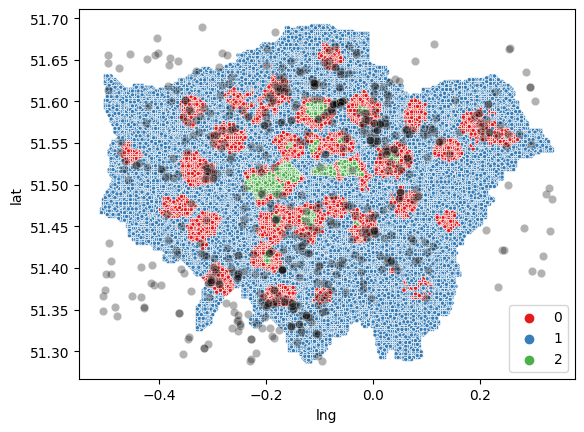

-------------------------------------MinMax liquorless----------------------------------------------------------


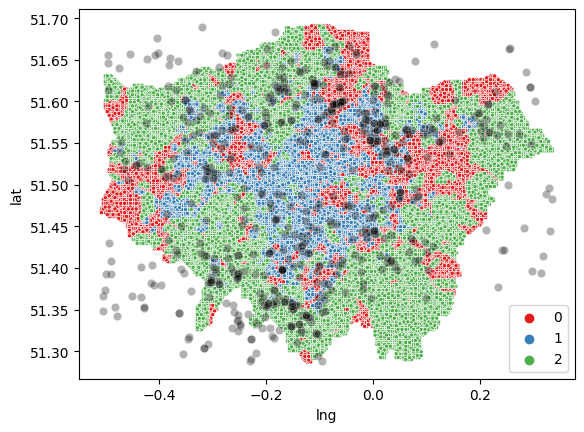

In [155]:
feature_elimination_function("liquor")